#Feature Extraction of Audio file
**Using audio mp4a file for feature extraction using signal processing**

#Importing library


In [2]:
import librosa
import librosa.display
import numpy as np
import math
import warnings
import scipy
warnings.filterwarnings('ignore')
from scipy.fft import fft, fftfreq
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from scipy.io import wavfile

# Importing the audio file
**file description**:Machine vibration audio for End Milling Operation
1. features.:-Spindle speed,feed,depth of cut,tool overhang,number of flutes







In [ ]:
features=[]
#features.append(speed,feed,depth of cut,tool overhang,number of flutes)
features.extend([7000,100,1,50,2])
features

[7000, 100, 1, 50, 2]

In [4]:

y,sr = librosa.load('/content/trimS7000f100d6T50N2.m4a')



In [ ]:
Audio(data=y,rate=sr)

In [5]:

plt.plot(y)
plt.title('7000 rpm depth of cut=6')
plt.xlabel('frequency')
plt.ylabel('magnitude')



"plt.plot(y)\nplt.title('7000 rpm depth of cut=6')\nplt.xlabel('frequency')\nplt.ylabel('magnitude')"

* Detailed Info about audio signal

In [ ]:
print('\nShape of Signal:', y.shape)
print('Signal Datatype:', y.dtype)
print('freq_sample or sampling rate:',sr)
T=round(y.shape[0] / float(sr), 2)

N=y.shape[0]
print('Number of samples:',N , 'seconds')
duration = len(y)/sr
time= np.arange(0,duration,1/sr) #time vector

print('Signal (measurement) duration:',duration , 'seconds')


Shape of Signal: (450644,)
Signal Datatype: float32
freq_sample or sampling rate: 22050
Number of samples: 450644 seconds
Signal (measurement) duration: 20.437369614512473 seconds


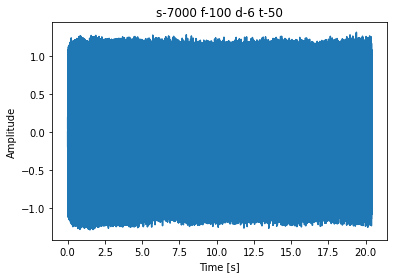

<Figure size 936x360 with 0 Axes>

In [ ]:




plt.plot(time,y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('s-7000 f-100 d-6 t-50')
plt.figure(figsize=(13, 5))
plt.show()





* Signal to Noise Ratio : Compares the level of a desired signal to the level of background noise

In [ ]:

def signaltonoise(Arr, axis=0, ddof=0):
    Arr = np.asanyarray(Arr)
    me = Arr.mean(axis)
    sd = Arr.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)
signal_to_noise=signaltonoise(y,axis=0,ddof=0)
print('signal to noise ratio',signal_to_noise)
features.append(signal_to_noise)

signal to noise ratio 0.001088127144612372




**Power Spectral Density (PSD)** : It is  a measure of a signal's power content versus frequency. It describes how the power of a signal or time series is distributed across different frequency components. PSD is particularly useful in signal processing, telecommunications, and many other fields for analyzing the frequency characteristics of signals.

**Key Concepts of Power Spectral Density:**

1. Power: The power of a signal is the average energy per unit time.
2. Spectral Density:This represents how power is distributed across various frequency components of the signal.
3. Frequency Domain Analysis: PSD provides insights into the frequency content of signals, revealing periodicities, and identifying dominant frequencies.



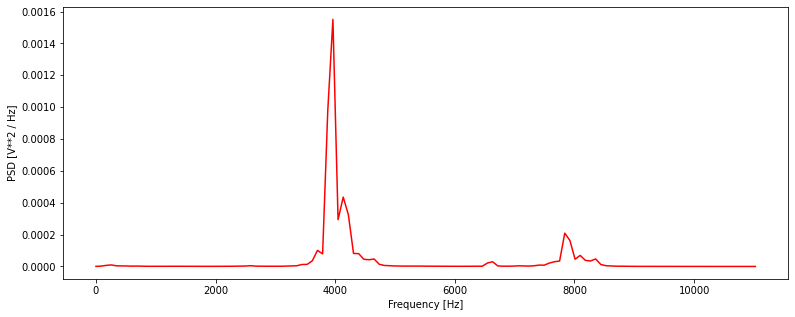

Max magnitude PSD for depth of cut =3 (red):  0.001551044 Corresponding frequency:  3962.109375


In [ ]:
from scipy.signal import welch
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
f_values, psd_values = get_psd_values(y, T, N, sr)
#f_values2, psd_values2 = get_psd_values(y2, T2, N2, sr2)
#fig, ax = plt.subplots()
plt.figure(figsize=(13, 5))

plt.plot(f_values, psd_values, linestyle='-', color='red')

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.legend
plt.show()
max_y = max(psd_values)  # Find the maximum y value
max_x = f_values[psd_values.argmax()]  # Find the x value corresponding to the maximum y value
print("Max magnitude PSD for depth of cut =3 (red): ", max_y, "Corresponding frequency: ", max_x)


**Audio Waveform**

signal amplitude max:  1.3159361 Corresponding Time:  19.386666666666667


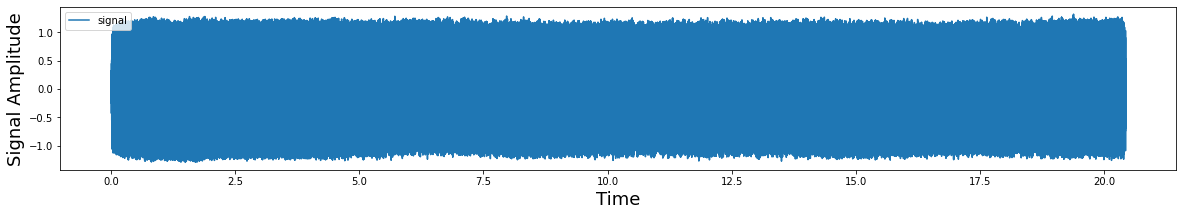

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(time,y, label='signal')
ax.set_ylabel('Signal Amplitude', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
ax.legend()
max_y = max(y) # Find the maximum y value
max_x = time[y.argmax()]  # Find the x value corresponding to the maximum y value
print("signal amplitude max: ", max_y, "Corresponding Time: ", max_x)

**FFT plot**:Fast Fourier Transform (FFT) is a highly efficient algorithm for computing the Discrete Fourier Transform (DFT) of a signal, which transforms the signal from the time domain to the frequency domain. This allows us to analyze the frequency components present in the signal.

**Explanation of the Plot:**
1. *X-axis (Frequency):* Shows the frequency components present in the signal. Only the positive frequencies are plotted because the FFT output is symmetric about the zero frequency.
2. *Y-axis (Magnitude):* Shows the magnitude of the frequency components. Peaks in the plot correspond to the dominant frequencies in the signal.


**Applications of FFT:**

1. Signal Processing:
* Analyzing the frequency content of signals for filtering, modulation, and
demodulation.
* Identifying and removing unwanted frequency components (noise).

2. Audio Analysis:
* Analyzing the frequency spectrum of audio signals for music and speech processing.
* Designing equalizers and other audio effects.

3. Communications:
* Analyzing the frequency characteristics of communication signals.
* Designing and optimizing communication systems.

4. Biomedical Engineering:
* Analyzing physiological signals such as ECG and EEG.
* Detecting abnormalities and understanding physiological processes.

5. Vibration Analysis:
* Monitoring and diagnosing mechanical systems by analyzing vibration signals.
* Detecting faults and predicting failures in machinery.

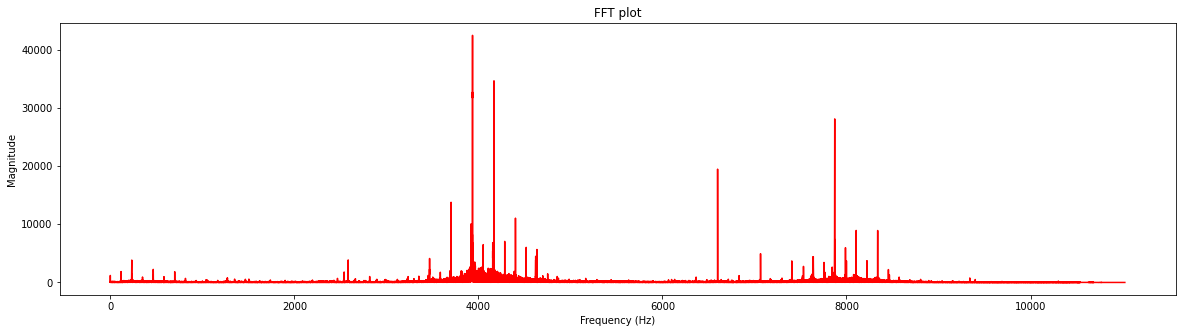

Max magnitude:  42481.098 Corresponding frequency:  3936.2697606092615


In [ ]:
from scipy.fft import fft, fftfreq
def fft_and_display(signal, sr):
    ft = scipy.fftpack.fft(signal, n=len(signal))
    ft = ft[:len(signal)//2+1]
    ft_mag = np.absolute(ft)
    f = np.linspace(0, sr/2, len(ft_mag)) # frequency variable
    plt.figure(figsize=(20, 5))
    plt.plot(f, ft_mag,color='red') # magnitude spectrum

    plt.ylabel('Magnitude')
    plt.title('FFT plot')
    plt.xlabel('Frequency (Hz)')
    plt.show()
    max_y = max(ft_mag)  # Find the maximum y value
    max_x = f[ft_mag.argmax()]  # Find the x value corresponding to the maximum y value
    print("Max magnitude: ", max_y, "Corresponding frequency: ", max_x)
    #features.extend([max_y,max_x])
fft_and_display(y,sr )


**Autocorrelation**: it is a statistical technique used to measure the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It is often used in signal processing, time series analysis, and econometrics to identify repeating patterns, such as periodic signals, and to assess the randomness of a data set.


**Key Concepts of Autocorrelation:**

1. Lag:The number of time steps by which the time series is shifted.
2. Autocorrelation Function (ACF):The function that measures the correlation between the time series and its lagged version at different lags.



In [ ]:

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values


t_values, autocorr_values = get_autocorr_values(y, T, N, sr)
plt.figure(figsize=(13, 5))
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()

In [ ]:
"""plt.figure(figsize=(20, 5))
librosa.display.waveplot(np.array(y),sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')"""


**Spectrograph** : Using a spectrogram we represent the noise or sound intensity of audio data with respect to frequency and time. On the premise of those frequency values we assign a color range, with lower values as a brighter color and high frequency values as a darker color. A spectrogram may be a sort of heatmap.

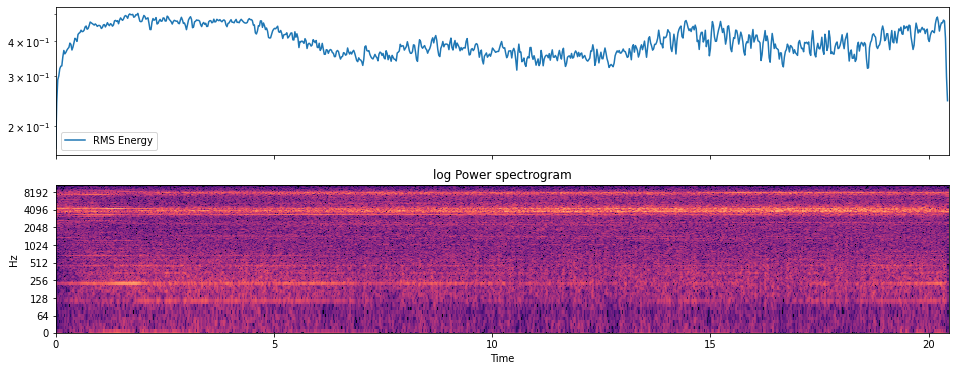

RMSE 0.5011464624659315


In [ ]:
S, phase = librosa.magphase(librosa.stft(y))
S_db=librosa.amplitude_to_db(S, ref=np.max)
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True,figsize = (16, 6))
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(S_db,
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()
RMSE=rms.max()
print('RMSE',RMSE)


# Statistical Features

In [ ]:
from collections import Counter
def describe_freq(freqs):
    mean = np.mean(freqs)
    std = np.std(freqs)
    maxv = np.amax(freqs)
    minv = np.amin(freqs)
    madev=np.mean(np.absolute(freqs - np.mean(freqs)))#Mean absolute deviation of a signal
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)
    counter_values = Counter(freqs).most_common()
    probabilities = [elem[1]/len(freqs) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    Features = ['Mean', 'Std', 'Max_value', 'Min_value','Mean absolute deviation of a signal', 'Median', 'Skewness', 'Kurtosis', 'Q1', 'Q3', 'Mode', 'IQR','Entropy']
    values= [mean, std, maxv, minv,madev, median, skew, kurt, q1, q3, mode, iqr,entropy]
    features.extend( [mean, std, maxv, minv,madev, median, skew, kurt, q1, q3, mode, iqr,entropy])
    #print(values)

    Statistical_Features={}
    for i in range(len(Features)):
        Statistical_Features[Features[i]]=values[i]

    return Statistical_Features


In [ ]:
freqs=y
mean = np.mean(freqs)
std = np.std(freqs)
maxv = np.amax(freqs)
minv = np.amin(freqs)
madev=np.mean(np.absolute(freqs - np.mean(freqs)))#Mean absolute deviation of a signal
median = np.median(freqs)
skew = scipy.stats.skew(freqs)
kurt = scipy.stats.kurtosis(freqs)
q1 = np.quantile(freqs, 0.25)
q3 = np.quantile(freqs, 0.75)
mode = scipy.stats.mode(freqs)[0][0]
iqr = scipy.stats.iqr(freqs)
counter_values = Counter(freqs).most_common()
probabilities = [elem[1]/len(freqs) for elem in counter_values]
entropy=scipy.stats.entropy(probabilities)
features.extend( [mean, std, maxv, minv,madev, median, skew, kurt, q1, q3, mode, iqr,entropy])

In [ ]:
"""describe_freq(y)"""


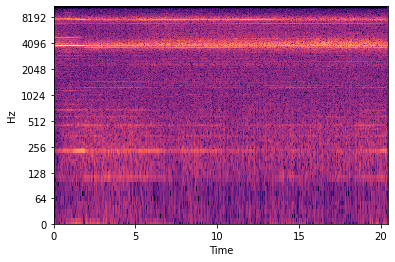

In [ ]:
D=librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
#y axis 'log' is used because it shows more structure 'linear' can also be used


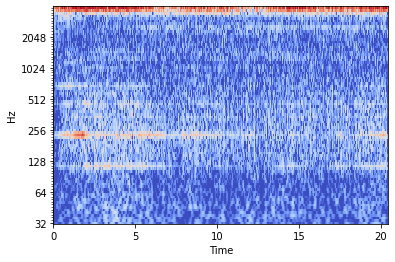

In [ ]:
# what if i want direct log-frequency analysis we can use constant-q-transform
c=librosa.cqt(y,sr)
librosa.display.specshow(librosa.amplitude_to_db(c**2),y_axis='cqt_hz', x_axis='time')


**pitch vs pitch class
CQT measures the energy in each pitch
chroma measures the energy in each pitch**

#Spectal Features

1. Spectral Centroid: It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
2. SPECTRAL ROLLOFF:In this method we try to analyze the waveform in which our frequency drops suddenly from high to 0. In the language of calculus we can say that there is a non-differentiability point in our waveform.
3. SPECTRAL BANDWIDTH:Bandwidth is defined as the change or difference in two frequencies, like high and low frequencies.
4. Zero crossing rate:The ZCR of an audio frame is defined as
the rate of change of sign of the signal during the frame. Mathematically, it is the number of times a signal changes its sign from
positive to negative and vice versa, divided by the length of the
frame. In simple words, ZCR is the number of times signal crosses
the zero level in one second interval
**ZCR is also a technique to estimate fundamental frequency (FF)
 of the speech. The ZCR is equal to the twice the frequency of
the signal. Hence, we can say that ZCR gives indirect information
about the frequency of the signal. Hence, this feature can be used
to design discriminator and classifier**

In [ ]:
def mean_Spectal_Feature(y):
    spectral_centroid = librosa.feature.spectral_centroid(y)[0].mean()
    spectral_bandwidth=librosa.feature.spectral_bandwidth(y)[0].mean()
    spectral_contrast=librosa.feature.spectral_contrast(y)[0].mean()
    spectral_flatness=librosa.feature.spectral_flatness(y)[0].mean()
    spectral_rolloff=librosa.feature.spectral_rolloff(y)[0].mean()
    Features = ['spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff']
    values= [spectral_centroid, spectral_bandwidth,spectral_contrast, spectral_flatness,spectral_rolloff]
    #features.extend([spectral_centroid, spectral_bandwidth,spectral_contrast, spectral_flatness,spectral_rolloff])
    #print(values)
    Spectal_Features={}
    for i in range(len(Features)):
        Spectal_Features[Features[i]]=values[i]
    return Spectal_Features

In [ ]:
spectral_centroid = librosa.feature.spectral_centroid(y)[0].mean()
spectral_bandwidth=librosa.feature.spectral_bandwidth(y)[0].mean()
spectral_contrast=librosa.feature.spectral_contrast(y)[0].mean()
spectral_flatness=librosa.feature.spectral_flatness(y)[0].mean()
spectral_rolloff=librosa.feature.spectral_rolloff(y)[0].mean()
features.extend([spectral_centroid, spectral_bandwidth,spectral_contrast, spectral_flatness,spectral_rolloff])

In [ ]:
mean_Spectal_Feature(y)

{'spectral_bandwidth': 2265.410603607612,
 'spectral_centroid': 5019.160921335398,
 'spectral_contrast': 11.869411564058826,
 'spectral_flatness': 0.02074598,
 'spectral_rolloff': 7925.501943148765}

Text(0.5, 1.0, 'Spectral Centroid')

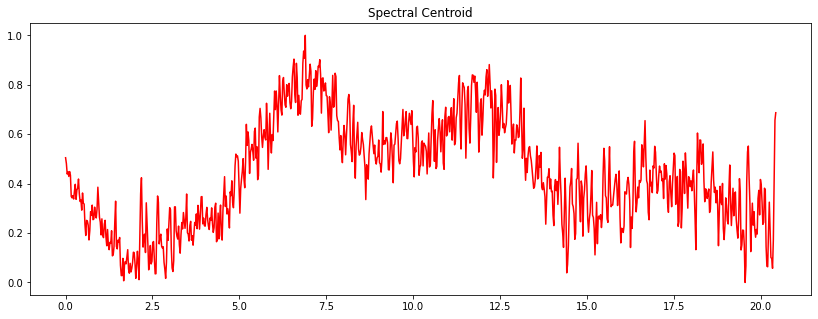

In [ ]:

import sklearn
plt.figure(figsize=(14, 5))
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
#librosa.display.waveplot(y, sr=sr, alpha=0.8)
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Spectral Centroid')

#Chromagram

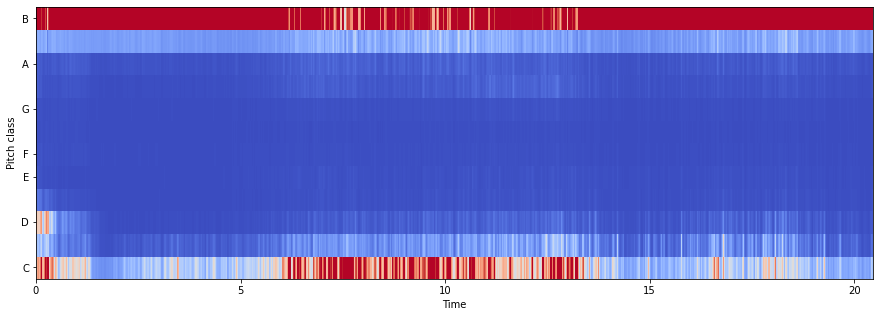

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# RMSE

In [ ]:
rmse=librosa.feature.rms(y=y,frame_length=2048, hop_length=512)[0]
rmse.shape
#plot rmse
"""plt.figure(figsize=(10,6))
librosa.display.waveplot(y,alpha=0.5)
plt.plot(rmse,color='r')"""
RMSE=rmse.mean()
print('RMSE',RMSE)
features.append(RMSE)

RMSE 0.65585697


In [ ]:
# Pre-requisite - Import the writer class from the csv module
from csv import writer
with open('/content/stastical analysis.csv', 'a', newline='') as f_object:
    # Pass the CSV  file object to the writer() function
    writer_object = writer(f_object)
    # Result - a writer object
    # Pass the data in the list as an argument into the writerow() function
    writer_object.writerow(features)
    # Close the file object
    f_object.close()

In [ ]:
features

Text(0, 0.5, 'Frequency bands')

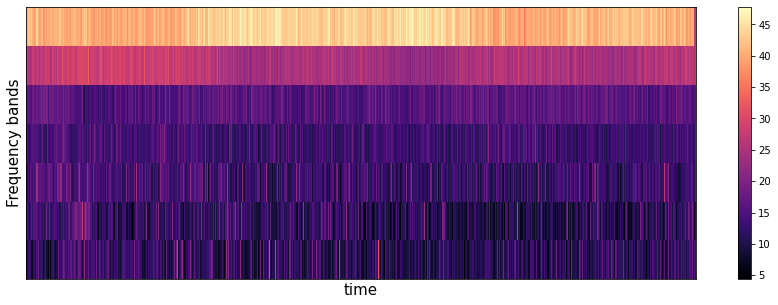

In [ ]:
contrast = librosa.feature.spectral_contrast(y=y,sr=sr)

plt.figure(figsize=(15,5))
librosa.display.specshow(contrast)
plt.colorbar()
plt.xlabel('time',fontsize=15)
plt.ylabel('Frequency bands',fontsize=15)

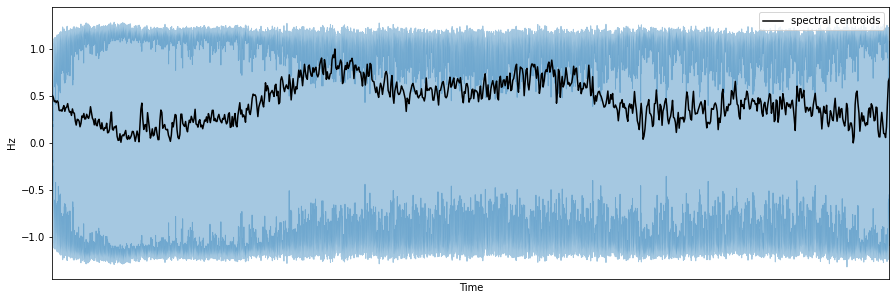

In [ ]:
# compute the spectral centroid for each frame in a signal
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# compute the time variable for visualization
frames = range(len(spectral_centroids))
f_times = librosa.frames_to_time(frames)

# an auxiliar function to normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_centroids), color='black', label='spectral centroids')
plt.ylabel('Hz')
plt.xticks([])
plt.legend()

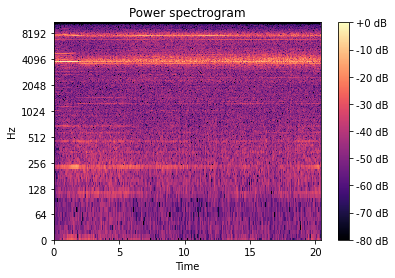

In [ ]:
S = np.abs(librosa.stft(y))
S_left = librosa.stft(y, center=False)
D_short = librosa.stft(y, hop_length=64)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
